# Reference | 4. Getting started with neural networks



In [4]:
from IPython.display import YouTubeVideo

## Aurélien Géron, Cross-Entropy

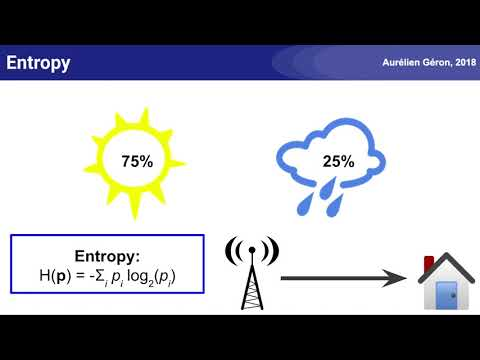

In [5]:
YouTubeVideo("ErfnhcEV1O8", width=853, height=480) # Aurélien Géron, Intro to Entropy, Cross-Entropy, KL

## Activations Functions

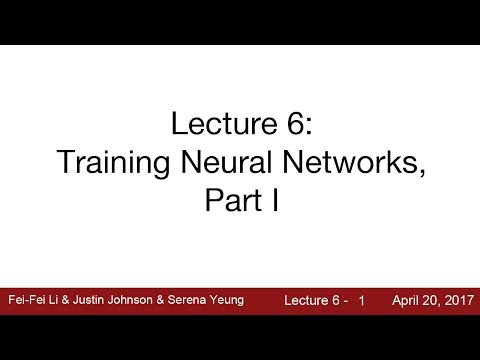

In [6]:
# A great in-depth overview of activation functions (and more)
YouTubeVideo('wEoyxE0GP2M', width=853, height=480, start=289) # Stanford cs231n Activation Functions

## Bias/Variance Tradeoff

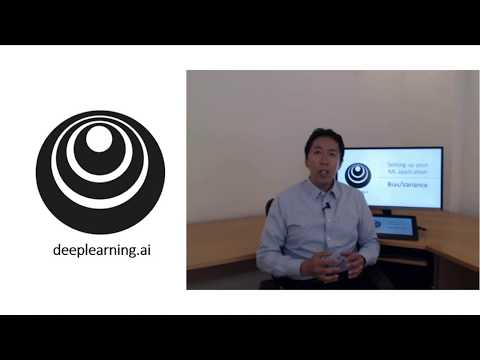

In [7]:
# A good discussion of hyperparam search
YouTubeVideo('SjQyLhQIXSM', width=853, height=480) # Andrew Ng Bias/Variance

Also, a [nice, accessible summary by Santiago on X](https://twitter.com/svpino/status/1584515105374339073?t=cYoz1-lqowkiDkOrac65Nw).

## Hyperparameter search

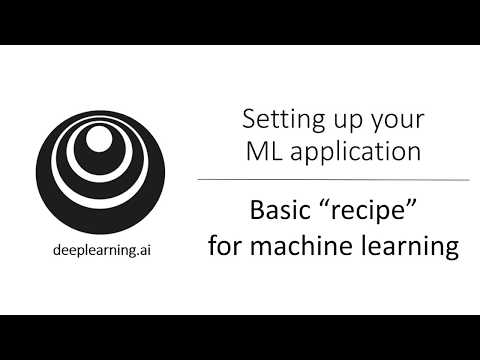

In [8]:
# A good discussion of hyperparam search
YouTubeVideo('C1N_PDHuJ6Q', width=853, height=480) # Andrew Ng Basic Recipe for Machine Learning

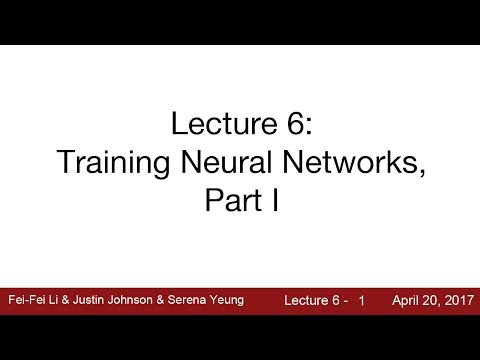

In [9]:
# A good discussion of hyperparam search
YouTubeVideo('wEoyxE0GP2M', width=853, height=480, start=4054) # Stanford cs231n Training 1

## Exponential Moving Averages

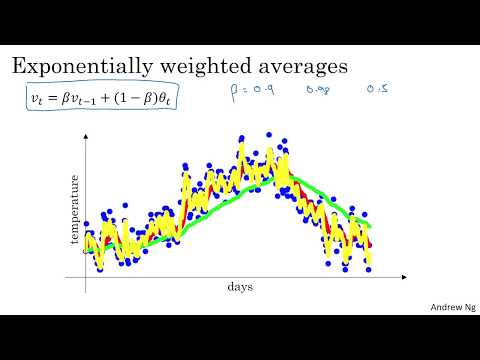

In [11]:
YouTubeVideo('NxTFlzBjS-4', width=853, height=480) # Andrew Ng Exponential Averages

## Extra: housing and social mobility 

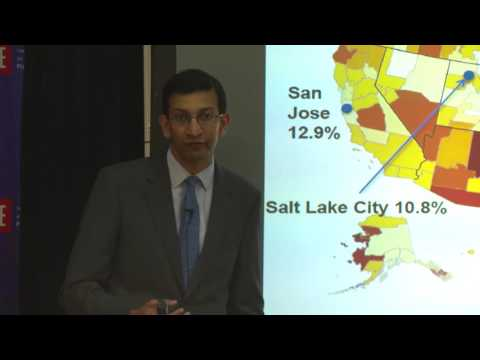

In [10]:
YouTubeVideo('Gzo65lP7yOk', width=853, height=480) # The Geography of Intergenerational Mobility